In [95]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [96]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(15,12)}
        )

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся [здесь](https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv).

In [97]:
step_1_df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')

In [98]:
step_1_df_plot = step_1_df.pivot(index='date', columns='user_type', values='visits')

In [99]:
step_1_df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


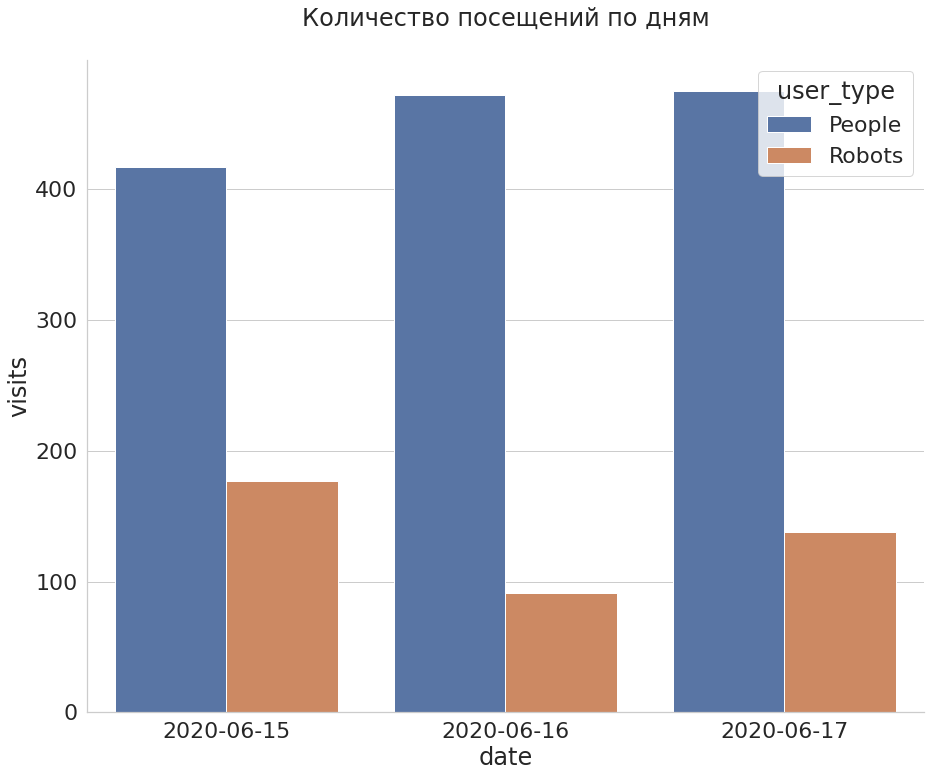

In [100]:
ax = sns.barplot(data=step_1_df, x='date', y='visits', hue='user_type')
ax.set_title('Количество посещений по дням\n')
sns.despine()

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат [здесь](https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv).

In [101]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'

In [102]:
step_2_df = pd.read_csv(url)

In [103]:
step_2_df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [104]:
round(step_2_df[step_2_df.browser == 'Google Chrome'].visits.sum()/ step_2_df.visits.sum()*100)

60

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на [данные](https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv) и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.

In [105]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'

In [106]:
step_3_df = pd.read_csv(url)

In [107]:
step_3_df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [108]:
visits_step_3 = step_3_df.groupby(['browser'], as_index=False) \
         .agg({'visits': 'sum'}) \
         .rename(columns={'visits': 'sum_visits'})

In [109]:
merged_df = step_3_df.merge(visits_step_3, on='browser')

In [110]:
merged_df[merged_df['user_type'] == 'Robots']['visits'] / merged_df[merged_df['user_type'] == 'Robots']['sum_visits'] 

1     0.293785
3     0.129630
4     0.534483
7     0.536585
10    0.062500
12    0.312500
14    0.111111
15    1.000000
17    0.200000
20    0.500000
dtype: float64

In [111]:
merged_df.iloc[15]

date          2020-06-15
browser            UCWEB
user_type         Robots
visits                 4
sum_visits             4
Name: 15, dtype: object

Выгрузите [данные](https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv), содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

In [112]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'

In [113]:
step_4_df = pd.read_csv(url)

In [114]:
step_4_df['percent_visits'] = round(step_4_df.visits / step_4_df.visits.sum()*100, 1)

При помощи библиотеки `gspread` отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

In [115]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'testname@karpov-400511.iam.gserviceaccount.com'
path_to_credentials = 'credentials.json'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [116]:
# Name of the table in google sheets,
# can be url for open_by_url
# or id (key) part for open_by_key
table_name = 'Test_table'  # Your table

# Get this table
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1


In [117]:
spreadsheet_key = '1Ocfel-Z34vOwbgzH1jmWL4FOc3gfCfLAfN5yKwHfvtE'
wks_name = 'Master'
d2g.upload(step_4_df, spreadsheet_key, wks_name, credentials=credentials, row_names=True)


<Worksheet 'Master' id:633605525>

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение `visits` к `users`) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)
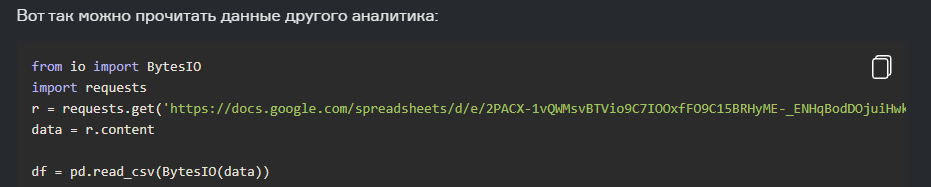

In [118]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [119]:
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [120]:
step_7_df = step_4_df.merge(df, on=["date", "browser", "user_type"], how='inner').drop('percent_visits', axis=1)

In [121]:
step_7_df['CT'] = round(step_7_df['visits'] / step_7_df['users'])

In [122]:
step_7_df

,date,browser,user_type,visits,users,CT
0,2020-06-15,Google Chrome,People,250.0,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.0
5,2020-06-15,Firefox,People,27.0,26.0,1.0
6,2020-06-15,Safari,Robots,22.0,20.0,1.0
7,2020-06-15,Safari,People,19.0,17.0,1.0
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.0
9,2020-06-15,Opera,People,11.0,10.0,1.0


В рамках дополнительного проекта попробуем освоить API, позволяющий получать данные о музейных коллекциях. Это задание может пригодиться для большего понимания того, какими способами можно собирать и обрабатывать данные, например, для собственного проекта или другой рабочей задачи.

### Описание API
Документация: https://metmuseum.github.io

Ключ: для использования выбранного API (на момент написания задания) ключ не требуется :)

Всего есть 4 основных раздела:

* Объекты (Objects)
* Объект (Object) – данные об объекте (например, о картине)
* Департаменты (Departments) –  данные о департаменте/разделе (например, "Современное искусство") 
* Поиск (Search) – используется для поиска

В рамках задач поработаем с блоками Object и Search.



In [123]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflowers')
res = r.json()

In [124]:
object_ids = res['objectIDs']


In [125]:
object_ids

[436524,
 484935,
 437112,
 210191,
 431264,
 397949,
 656530,
 480725,
 486590,
 485308,
 375281,
 705155,
 11922,
 343052,
 20141,
 347980,
 208554,
 403496,
 360837,
 207869,
 437115,
 400581,
 423400,
 707887,
 223828,
 682927,
 57922,
 79739,
 193938,
 649813,
 339347,
 208218,
 202228,
 437984,
 761604,
 696949,
 704667,
 822589,
 822590,
 437329,
 363282,
 207753,
 822570,
 816522,
 487043,
 203893,
 436580,
 436252,
 367434,
 190739,
 2032,
 423237,
 262423,
 839296,
 436534,
 437526,
 367817,
 13644,
 18362,
 820022,
 648617,
 761731,
 814626,
 892559,
 207967,
 626832,
 2019,
 701016,
 262430,
 262428,
 841928,
 205386,
 262378,
 707697,
 426804,
 436535,
 633526,
 369073,
 747779,
 436529,
 436121,
 852414,
 427872,
 895564,
 436144,
 436530,
 724844,
 437980,
 631808,
 396836,
 834765,
 834580,
 834585]

In [126]:

OBJECT_ID = 696949
r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{OBJECT_ID}')
obj_test = r_test.json()

'message' not in obj_test.keys()

False

Теперь напишите цикл, с помощью которого будет собрана информация об объектах, которые были получены на 2 шаге. Результаты запишите в датафрейм, а именно – следующие параметры:

1. objectID – id объекта
1. title – название
1. artistDisplayName – автор
1. department – департамент
1. objectBeginDate – дата (начало)
1. objectEndDate – дата (конец)
1. period – название периода
1. objectName – название/категория объекта
1. culture – культура

In [127]:
result = pd.DataFrame()

for obj_id in object_ids:
    r = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{obj_id}')
    obj = r.json()
    if 'message' not in obj.keys():
        obj_inf = pd.DataFrame({'objectID': [obj['objectID']],
                           'title': [obj['title']],
                           'artistDisplayName': [obj['artistDisplayName']],
                           'department': [obj['department']],
                           'objectBeginDate': [obj['objectBeginDate']],
                           'objectEndDate': [obj['objectEndDate']],
                           'period': [obj['period']],
                           'objectName': [obj['objectName']],
                           'culture': [obj['culture']]})
        result = pd.concat([result, obj_inf])
result    

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,436524,Sunflowers,Vincent van Gogh,European Paintings,1887,1887,,Painting,
0,484935,Sunflowers,Edward McKnight Kauffer,Modern and Contemporary Art,1921,1921,,Painting,
0,437112,Bouquet of Sunflowers,Claude Monet,European Paintings,1881,1881,,Painting,
0,210191,Vase with sunflowers,Rozenburg Plateelfabriek,European Sculpture and Decorative Arts,1896,1896,,Vase,
0,431264,Sunflowers,Lily Converse,Drawings and Prints,1941,1941,,Print,
...,...,...,...,...,...,...,...,...,...
0,437980,Cypresses,Vincent van Gogh,European Paintings,1889,1889,,Painting,
0,396836,The Aesthetic Craze,Currier & Ives,Drawings and Prints,1882,1882,,Print,
0,834765,"A Child's Garden, from ""Picture Poesies""",Arthur Boyd Houghton,Drawings and Prints,1865,1874,,Print,
0,834580,"A Life in a Year–The Garden–Noon, from ""Pictur...",Arthur Boyd Houghton,Drawings and Prints,1866,1874,,Print,


In [128]:
result[result.culture == 'Japan'].culture .value_counts()

Japan    1
Name: culture, dtype: int64

Теперь попробуем построить более сложный запрос с помощью секции "Search"! На этот раз параметры необходимо передать через "&", например, `departmentId` (id департамента – 1) и `q` (ключевое слово – cat):

Выполните поисковый запрос для департамента "Asian art" (departmentId = 6) с тегом "cat" и запишите id объектов в cat_ids. Используйте цикл из шага 4, чтобы получить данные о первой 1000 объектов из списка.

Note: выполнение цикла может занять некоторое время (~5 минут), поэтому проверять его работоспособность лучше на более маленькой выборке!

В качестве ответа укажите, в каком периоде (`period`) было выполнено наибольшее количество работ, представленных в музее?

In [140]:
result_cats = pd.DataFrame()

r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=6&q=cat')
cats = r.json()
cats_ids = cats['objectIDs']


for cat_id in cats_ids[:1000]:
    r = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{cat_id}')
    obj = r.json()
    if 'message' not in obj.keys():
        obj_inf = pd.DataFrame({'objectID': [obj['objectID']],
                           'title': [obj['title']],
                           'artistDisplayName': [obj['artistDisplayName']],
                           'department': [obj['department']],
                           'objectBeginDate': [obj['objectBeginDate']],
                           'objectEndDate': [obj['objectEndDate']],
                           'period': [obj['period']],
                           'objectName': [obj['objectName']],
                           'culture': [obj['culture']]})
        result_cats = pd.concat([result_cats, obj_inf])
result_cats    

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,49698,Cat,Zhang Yuguang,Asian Art,1900,1968,,Folding fan mounted as an album leaf,China
0,49470,Cat,Wang Li,Asian Art,1813,1879,Qing dynasty (1644–1911),Hanging scroll,China
0,36221,Cat,Wang Yun,Asian Art,1900,1933,,Hanging scroll,China
0,53222,Musk Cat,Uto Gyoshi,Asian Art,1550,1599,Muromachi period (1392–1573),Hanging scroll,Japan
0,60873,Head ornament,,Asian Art,960,1279,Song dynasty (960–1279) or later,Head ornament,China
...,...,...,...,...,...,...,...,...,...
0,45988,Stand for Alcove Ornament,,Asian Art,1840,1840,Edo period (1615–1868),Stand,Japan
0,45871,Vase with lid,,Asian Art,1700,1799,Edo period (1615–1868),Vase with lid,Japan
0,45838,Vase with cover,,Asian Art,1720,1720,Edo period (1615–1868),Vase with cover,Japan
0,45959,Vase,,Asian Art,1800,1899,Edo (1615–1868) or Meiji period (1868–1912),Vase,Japan


In [141]:
result_cats.period.value_counts()

Edo period (1615–1868)                                274
                                                      144
Qing dynasty (1644–1911)                               66
Ming dynasty (1368–1644)                               42
Muromachi period (1392–1573)                           32
                                                     ... 
Yuan (1271–1368)                                        1
Five Dynasties (907–60) or Liao dynasty (907–1125)      1
Ming dynasty (?) (1368–1644)                            1
Visnukundin                                             1
Khmer Empire (802–1431)                                 1
Name: period, Length: 124, dtype: int64

In [137]:
result_cats

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,436524,Sunflowers,Vincent van Gogh,European Paintings,1887,1887,,Painting,
0,484935,Sunflowers,Edward McKnight Kauffer,Modern and Contemporary Art,1921,1921,,Painting,
0,437112,Bouquet of Sunflowers,Claude Monet,European Paintings,1881,1881,,Painting,
0,210191,Vase with sunflowers,Rozenburg Plateelfabriek,European Sculpture and Decorative Arts,1896,1896,,Vase,
0,431264,Sunflowers,Lily Converse,Drawings and Prints,1941,1941,,Print,
...,...,...,...,...,...,...,...,...,...
0,396836,The Aesthetic Craze,Currier & Ives,Drawings and Prints,1882,1882,,Print,
0,834765,"A Child's Garden, from ""Picture Poesies""",Arthur Boyd Houghton,Drawings and Prints,1865,1874,,Print,
0,834580,"A Life in a Year–The Garden–Noon, from ""Pictur...",Arthur Boyd Houghton,Drawings and Prints,1866,1874,,Print,
0,834585,"A Life in a Year–The Garden–Noon, from ""Pictur...",Arthur Boyd Houghton,Drawings and Prints,1866,1874,,Print,
